# Sentiment Analysis Tweet Pemilu Indonesia 2019
---


# Background
- Public opinion/tweet about Pemilu Indonesia 2019 in tweet apps
- This massive tweet data can be utilized as Sentiment Analysis detection of current people's tweets

# Objectives:
- Build sentiment analysis classifier to classify tweet as "Positive", "Negative", or "Neutral" sentiment
- Experimentation with Random Forest & LSTM algorithm

# About Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

<ipython-input-2-92b4a5d05920>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
import pandas as pd
df_master = pd.read_csv('https://raw.githubusercontent.com/Ishaq101/Sentiment-Analysis-Tweet-Pemilu-Indonesia-2019/main/tweet.csv')
df = df_master.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1815 non-null   int64 
 1   sentimen    1815 non-null   object
 2   tweet       1815 non-null   object
dtypes: int64(1), object(2)
memory usage: 42.7+ KB


In [ ]:
df.head()

,Unnamed: 0,sentimen,tweet
0,0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...


In [ ]:
df.tail()

,Unnamed: 0,sentimen,tweet
1810,1810,netral,Negarawan sejati sll bangga dan mengedepankan ...
1811,1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekon...
1812,1812,netral,Mari bangun bangsa dgn mendukung perekonomian ...
1813,1813,netral,Bantu majukan perekonomian bangsa bersama Pak ...
1814,1814,netral,Pak @jokowi mengubah cara pandang ekonomi. Kin...


In [ ]:
print("POSITIVE: ",df[df['sentimen']=='positif']['tweet'].iloc[99]) # Positive
print("NEGATIVE: ",df[df['sentimen']=='negatif']['tweet'].iloc[99]) # Negative
print("NEUTRAL: ",df[df['sentimen']=='netral']['tweet'].iloc[99]) # Netral

POSITIVE:  Dengan mencoblos @prabowo @sandiuno ,anda telah ikut bersodaqoh selama 5 tahun, karena gaji beliau diinfaqkan untuk duafa, anak yatim dll  Insya'allah pic.twitter.com/tnvSQENBem
NEGATIVE:  Amin.... Pelajaran berharga.. Fitnah kejam sepwrti ini telah di berikan kepada HRS tahun lalu.. Begitu mudah kan, rezim ini acak2 Ulama dan umat Islam... Siapa pelakunya?   Pelakunya Tdk jauh wereng coklat dipaksa jagal talangsari.
NEUTRAL:  #PilihOrangBaik #PilihJelasIslamnya #PilihBajuPutih  Berbagai pencapaian telah berhasil tercapai. Khususnya pertumbuhan ekonomi di era pemerintahan @jokowi -JK, sangat jauh meningkat.   HYPERLINK " https://www.youtube.com/watch?v=p8qVUqCF9ioÂ â€¦"  https://www.youtube.com/watch?v=p8qVUqCF9ioÂ â€¦]


In [ ]:
df['sentimen'].value_counts()

sentimen
positif    612
netral     607
negatif    596
Name: count, dtype: int64

In [ ]:
df = df[['sentimen','tweet']]

In [ ]:
df['tweet_len'] = df['tweet'].apply(lambda x: len(x.split())) # split by space

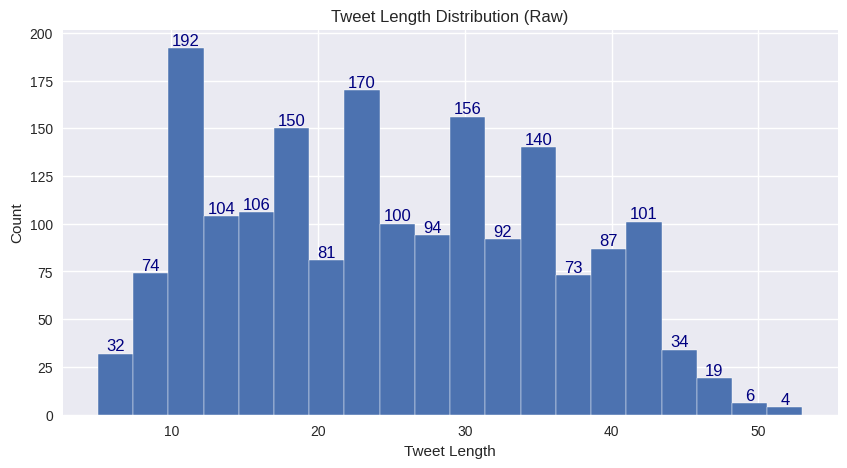

In [ ]:
plt.figure(figsize=(10, 5))
values, bins, bars = plt.hist(df['tweet_len'], edgecolor='white',bins=20)
plt.title('Tweet Length Distribution (Raw)')
plt.xlabel('Tweet Length')
plt.ylabel('Count')
plt.bar_label(bars, fontsize=12, color='navy')
plt.show()

# Data Cleaning

## URL, Email, Number, Mention, Hashtags, Non ASCII Character Handling

### URLs

In [ ]:
import re

def extract_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+|pic\..+|\b\w+\.com\b')
  return re.findall(url_pattern, text)

In [ ]:
df['urls'] = df['tweet'].apply(extract_urls)
print("Total URL:",df['urls'].apply(len).sum())

Total URL: 649


In [ ]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+|pic\..+|\b\w+\.com\b')
    return url_pattern.sub(' ', text)

In [ ]:
print('URL Removal')
text_sample = df['tweet'].iloc[1432]
print('BEFORE: ',text_sample)
print('AFTER: ',remove_urls(text_sample))

URL Removal
BEFORE:  Prabowo-Sandi: Kami komit tidak mengambil gaji  "Allah SWT begitu baik kepada Prabowo-Sandi, Indonesia, memberikan keleluasan kepada kami, kami komit tidak mengambil gaji, kami akan setorkan kepada negara," ~@sandiuno~   #TusukPrabowoSandi pic.twitter.com/fsTUsg4WKc
AFTER:  Prabowo-Sandi: Kami komit tidak mengambil gaji  "Allah SWT begitu baik kepada Prabowo-Sandi, Indonesia, memberikan keleluasan kepada kami, kami komit tidak mengambil gaji, kami akan setorkan kepada negara," ~@sandiuno~   #TusukPrabowoSandi  


### Emails

In [ ]:
def find_emails(text):
 pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\. [A-Z|a-z] {2,}\b'
 emails_found = re.findall(pattern, text)
 return emails_found

# def remove_email(text):
#     email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b')
#     return email_pattern.sub(' ', text)

df['emails'] = df['tweet'].apply(find_emails)

print("Total Emails:",df['emails'].apply(len).sum())

Total Emails: 0


### Numbers

In [ ]:
def find_numbers(text):
    return re.findall(r'\d+', text)

df['numbers'] = df['tweet'].apply(find_numbers)
print("Total Numbers:",df['numbers'].apply(len).sum())

Total Numbers: 2389


In [ ]:
def remove_numbers(text):
    number_pattern = re.compile(r'\d+')
    return number_pattern.sub(' ', text)

### Mentions

In [ ]:
def find_mentions(text):
    return re.findall(r'@[\w]*', text)

df['mentions'] = df['tweet'].apply(find_mentions)
print("Total Mentions:",df['mentions'].apply(len).sum())

Total Mentions: 774


In [ ]:
def remove_mentions(text):
    mention_pattern = re.compile(r'@[\w]*')
    return mention_pattern.sub(' ', text)

### Hastags

In [ ]:
def find_hashtags(text):
    return re.findall(r'#[\w.]+', text)

df['hashtags'] = df['tweet'].apply(find_hashtags)
print("Total Hashtags:",df['hashtags'].apply(len).sum())

Total Hashtags: 966


In [ ]:
def remove_hashtags(text):
  return re.sub(r'#[\w.]+', '  ', text)

In [ ]:
text_sample = df['tweet'].iloc[99]
print('BEFORE: ',text_sample)
print('AFTER: ',remove_hashtags(text_sample))

BEFORE:  Fyi gaes...Beberapa penghargaan yg dianugerahkan kepadanya, menjadi bukti bahwa @jokowi adalah sosok pemimpin yg diakui integritasnya.Â  https://nasional.kompas.com/read/2018/09/24/22563621/disaksikan-sandiaga-jokowi-dapat-penghargaan-tokoh-pemerataan-pembangunanÂ â€¦Â #PilihOrangBaikÂ #PilihJelasIslamnyaÂ #PilihBajuPutih
AFTER:  Fyi gaes...Beberapa penghargaan yg dianugerahkan kepadanya, menjadi bukti bahwa @jokowi adalah sosok pemimpin yg diakui integritasnya.Â  https://nasional.kompas.com/read/2018/09/24/22563621/disaksikan-sandiaga-jokowi-dapat-penghargaan-tokoh-pemerataan-pembangunanÂ â€¦Â         


### Non ASCII characters

In [ ]:
def find_nonascii(text):
  return re.findall(r'[^\x00-\x7f]', text)

df['nonascii'] = df['tweet'].apply(find_nonascii)
print("Total Non ASCII:",df['nonascii'].apply(len).sum())

Total Non ASCII: 4330


In [ ]:
def remove_nonascii(text):
  return re.sub(r'[^\x00-\x7f]', '  ', text)

In [ ]:
sample_text = df['tweet'].iloc[15]
print('Non ASCII removal')
print('BEFORE: ',sample_text)
print('AFTER: ',remove_nonascii(sample_text))

Non ASCII removal
BEFORE:  mantulz sekali pak..mengisi masa tenang dg umroh bersama kel tercinta, istri, anak2... pada ahirnya memang  keluarga lah asset plg berharga, sehat sll pakdeee...ðŸ‘ðŸ‘ðŸ‘
AFTER:  mantulz sekali pak..mengisi masa tenang dg umroh bersama kel tercinta, istri, anak2... pada ahirnya memang  keluarga lah asset plg berharga, sehat sll pakdeee...                        


## Punctuation Handling

In [ ]:
def find_punctuation(text):
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    return [char for char in text if char in punctuations]

df['punctuations'] = df['tweet'].apply(find_punctuation)
print("Total Punctuations:",df['punctuations'].apply(len).sum())


Total Punctuations: 16502


In [ ]:
def remove_punctuation(text):
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    return ''.join(' ' if char in punctuations else char for char in text)

sample_text = df['tweet'].iloc[15]
print('Punctuations removal')
print('BEFORE: ',sample_text)
print('AFTER: ',remove_punctuation(sample_text))

Punctuations removal
BEFORE:  mantulz sekali pak..mengisi masa tenang dg umroh bersama kel tercinta, istri, anak2... pada ahirnya memang  keluarga lah asset plg berharga, sehat sll pakdeee...ðŸ‘ðŸ‘ðŸ‘
AFTER:  mantulz sekali pak  mengisi masa tenang dg umroh bersama kel tercinta  istri  anak2    pada ahirnya memang  keluarga lah asset plg berharga  sehat sll pakdeee   ðŸ‘ðŸ‘ðŸ‘


## Case Folding (to lowercase)

In [ ]:
def to_lower_case(text):
    return text.lower()

In [ ]:
text_sample = df['tweet'].iloc[1]
print('BEFORE: ',text_sample)
print('AFTER: ',to_lower_case(text_sample))

BEFORE:  Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy?  http://dlvr.it/R2pvZVÂ 
AFTER:  batuan langka, tasbih jokowi hadiah dari habib luthfi seharga mercy?  http://dlvr.it/r2pvzvâ 


## Normalize Space

In [ ]:
def normalize_space(text):
  return re.sub(r"\s+", " ", text)  # Replace multiple spaces with a single space

## Stopwords Handling

In [ ]:
slangs_url = 'https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_slang_words.txt'
acronyms_url = 'https://raw.githubusercontent.com/ramaprakoso/analisis-sentimen/master/kamus/acronym.txt'
stopwods_url = 'https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_stop_words.txt'

In [ ]:
acronyms = pd.read_csv(acronyms_url,delimiter='\t',header=None)
acronyms.columns = ['raw']
acronyms[['acronyms','abbreviation']] = acronyms.raw.str.split(pat=' = ',expand=True)
acronyms_dict = pd.Series(acronyms.abbreviation.values,index=acronyms.acronyms).to_dict()

In [ ]:
len(acronyms_dict)

4084

In [ ]:
import json
slangs = pd.read_csv(slangs_url,delimiter='\t')
slangs_dict = json.loads(slangs.columns[0])

In [ ]:
del slangs_dict['@'] # remove slang @ because we already have puntuation handling for this case

In [ ]:
len(slangs_dict)

1017

In [ ]:
slangs_dict_manual = {"gak":"tidak","gaes":"teman","tsb":"tersebut","ngak":"tidak"} # this will be iterative

In [ ]:
slangs_acronyms_dict = {**acronyms_dict,**slangs_dict,**slangs_dict_manual}

In [ ]:
len(slangs_acronyms_dict)

4898

In [ ]:
def transform_slangs(text):
  words = text.split()
  text = [slangs_acronyms_dict[text] if text in list(slangs_acronyms_dict.keys()) else text for text in words]
  text = ' '.join(text)
  return text

In [ ]:
sample_text = 'gaes aku tidak suka baju yg putih'
print('BEFORE: ',sample_text)
print('AFTER: ',transform_slangs(sample_text))

BEFORE:  gaes aku tidak suka baju yg putih
AFTER:  teman aku tidak suka baju yang putih


In [ ]:
negation_words = {}

for _,k in enumerate(slangs_dict):
  if 'tidak' in slangs_dict[k]:
    negation_words[k] = slangs_dict[k]

negation_words = list(set(negation_words.values()))

In [ ]:
stopwords_owen = pd.read_csv(stopwods_url)
stopwords_owen = stopwords_owen[stopwords_owen.columns[0]].tolist()

In [ ]:
print("negation_words:",negation_words[:5])
print("stopwords:",stopwords_owen[:5])

negation_words: ['tidak apa-apa', 'tidak mau', 'tidak lucu', 'tidak punya pacar', 'tidak pakai lama']
stopwords: ['adapun', 'agaknya', 'akan', 'akhir', 'akhirnya']


In [ ]:
len(stopwords_owen)

674

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stopwords_nltk = list(set(stopwords.words('indonesian')))
len(stopwords_nltk)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


757

In [ ]:
stopwords_combine = list(set(stopwords_owen+stopwords_nltk))
len(set(stopwords_combine))

834

In [ ]:
def remove_stopwords(text,drop_negation=False):
  words = text.split()
  if drop_negation==True:
    filtered_words = [word for word in words if word not in stopwords_combine]
  else:
    filtered_words = [word for word in words if (word not in stopwords_combine or word=='tidak')]
  return ' '.join(filtered_words)


In [ ]:
sample_text = 'aku tidak suka janji-janji palsu'
print('BEFORE: ',sample_text)
print('AFTER: ',remove_stopwords(sample_text))

BEFORE:  aku tidak suka janji-janji palsu
AFTER:  tidak suka janji-janji palsu


In [ ]:
def remove_tiny_char(text):
  return re.sub(r'\b\w{1,2}\b', '', text)

In [ ]:
sample_text = 'Ak pengen lihat Indonesia jadi negara maju'
print('BEFORE: ',sample_text)
print('AFTER: ',remove_tiny_char(sample_text))

BEFORE:  Ak pengen lihat Indonesia jadi negara maju
AFTER:   pengen lihat Indonesia jadi negara maju


In [ ]:
def cleaning_text(text):
  text = remove_urls(text)
  text = remove_numbers(text)
  text = remove_mentions(text)
  text = remove_nonascii(text)
  text = remove_hashtags(text)
  text = to_lower_case(text)
  text = remove_punctuation(text)
  text = transform_slangs(text)
  text = remove_tiny_char(text)
  text = normalize_space(text)
  text = remove_stopwords(text,drop_negation=False)
  return text

In [ ]:
# Random Check Cleaning Text
import random
n = random.randint(0,len(df['tweet']))
text_sample = df['tweet'].iloc[n]
print(n)
print('BEFORE: ',text_sample)
print('AFTER: ',cleaning_text(text_sample))

1742
BEFORE:  20.â€œ@jokowi menciptakan iklim bisnis yang kondusif melalui paket kebijakan ekonomi serta kemudahan dalam perizinan usaha. Sehingga banyak investasi masuk ke Indonesia,â€ ujar Menteri Perindustrian Airlangga Hartarto  https://bit.ly/2GkzePqÂ  #JokowiMenangTotalDebat
AFTER:  menciptakan iklim bisnis kondusif paket kebijakan ekonomi kemudahan perizinan usaha investasi masuk indonesia menteri perindustrian airlangga hartarto


In [ ]:
# IMPORTANT
# this will be iterative
slangs_dict_manual = {"gak":"tidak","gaes":"teman","tsb":"tersebut","ngak":"tidak","bego":"bodoh","ln":"luar negeri","ci":"mba","smlm":"semalam","tps":"tempat pemungutan suara","ngutang":"berhutang", "bngun":"bangun","blm":"belum","menajdikan":"menjadikan"}
stopwords_manual = ['oh','oohhh','mba','tersebut','deh']

# UPDATE SLANGS AND STOPWORDS
slangs_acronyms_dict = {**slangs_acronyms_dict,**slangs_dict_manual}
stopwords_combine = list(set(stopwords_combine+stopwords_manual))

In [ ]:
df['tweet_clean'] = df['tweet'].apply(cleaning_text)

In [ ]:
df_clean = df[['tweet','tweet_clean','sentimen']]
df_clean.head()

,tweet,tweet_clean,sentimen
0,Kata @prabowo Indonesia tidak dihargai bangsa ...,indonesia tidak dihargai bangsa asing berita i...,negatif
1,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",batuan langka tasbih jokowi hadiah habib luthf...,netral
2,"Di era Jokowi, ekonomi Indonesia semakin baik....",era jokowi ekonomi indonesia indonesiamaju,netral
3,"Bagi Sumatera Selatan, Asian Games berdampak p...",sumatera selatan asian games berdampak ekonomi...,positif
4,Negara kita ngutang buat bngun infrastruktur y...,negara berhutang bangun infrastruktur dipake m...,negatif


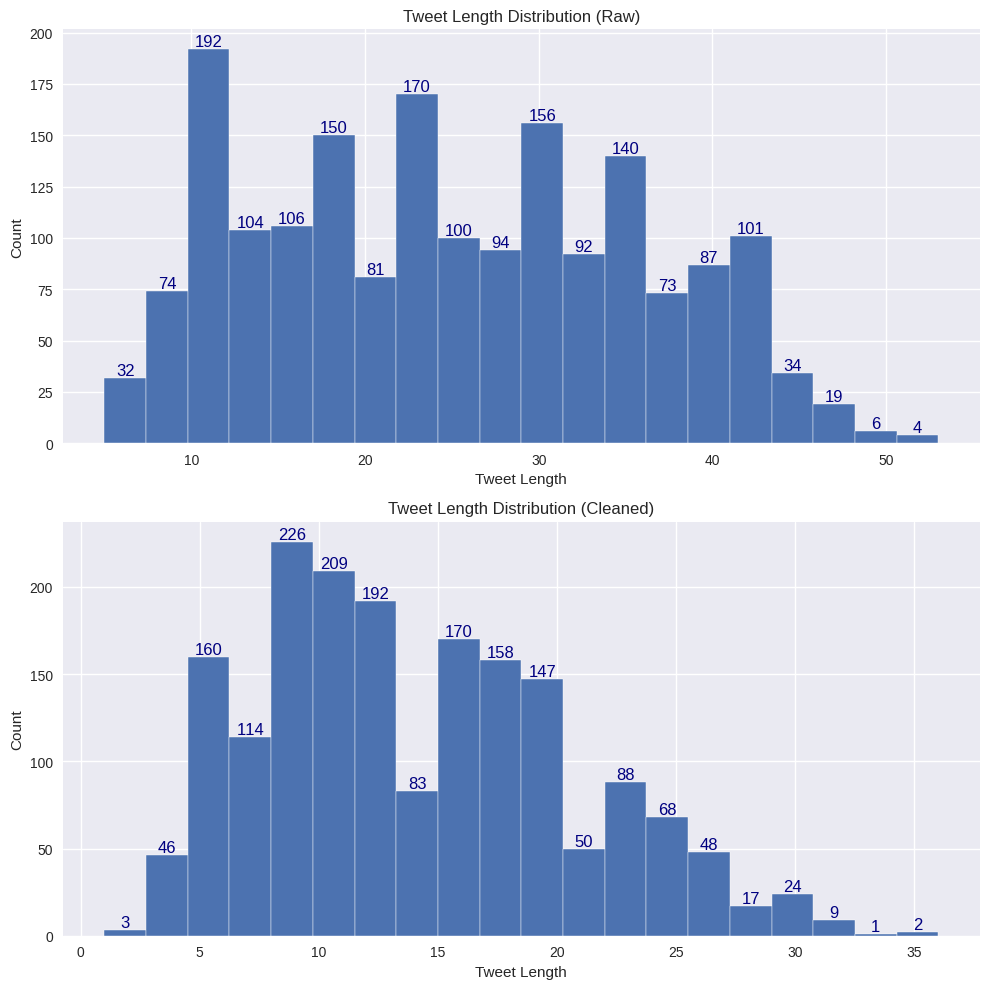

In [ ]:
plt.figure(figsize=(10, 10))
len_tweet = df_clean['tweet'].apply(lambda x: len(x.split()))
len_tweet_clean = df_clean['tweet_clean'].apply(lambda x: len(x.split()))

plt.subplot(2, 1, 1)
values, bins, bars = plt.hist(len_tweet, edgecolor='white',bins=20)
plt.title('Tweet Length Distribution (Raw)')
plt.xlabel('Tweet Length')
plt.ylabel('Count')
plt.bar_label(bars, fontsize=12, color='navy')

plt.subplot(2, 1, 2)
values, bins, bars = plt.hist(len_tweet_clean, edgecolor='white',bins=20)
plt.title('Tweet Length Distribution (Cleaned)')
plt.xlabel('Tweet Length')
plt.ylabel('Count')
plt.bar_label(bars, fontsize=12, color='navy')

plt.tight_layout()
plt.show()

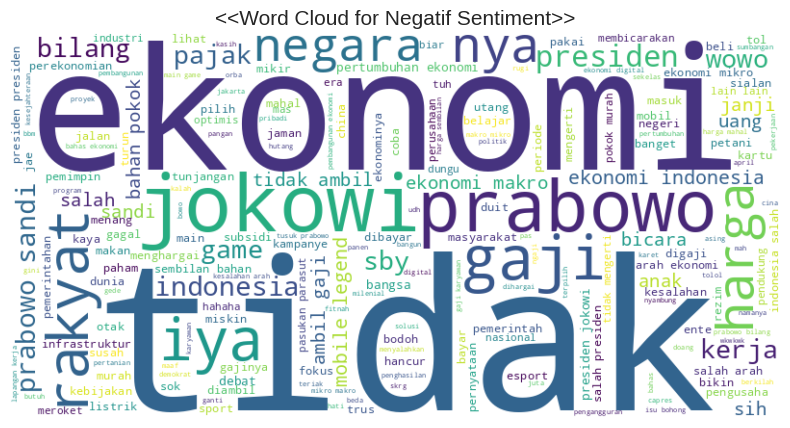

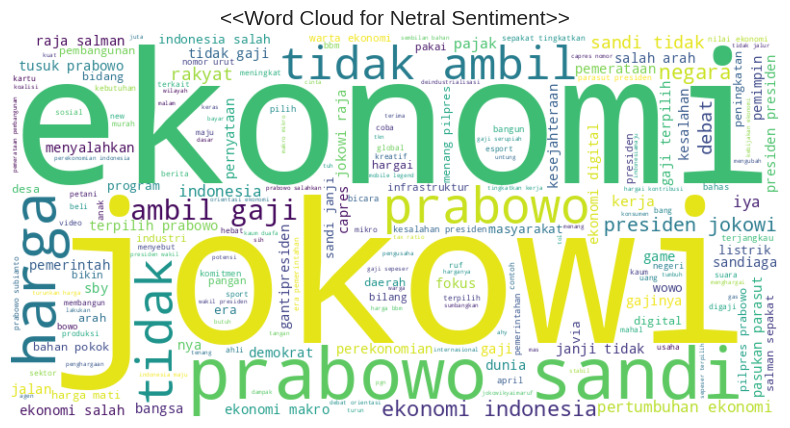

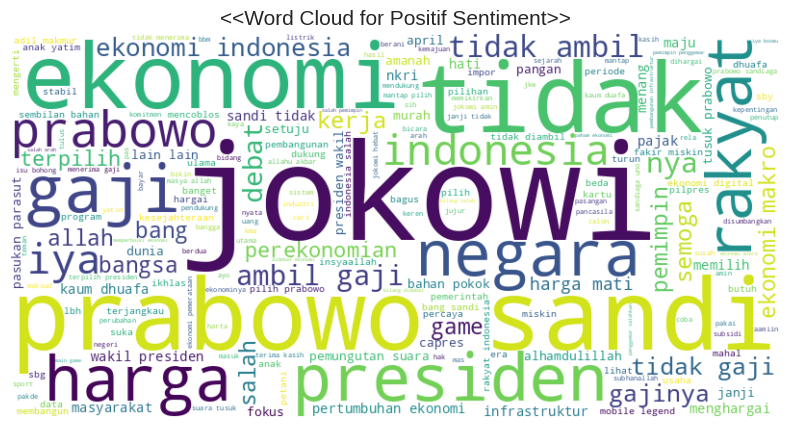

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fungsi untuk membuat word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


# Buat word cloud untuk setiap kelas sentimen
sentiments = df_clean['sentimen'].unique()

for sentiment in sentiments:
    text = " ".join(tweet for tweet in df[df['sentimen'] == sentiment]['tweet_clean'])
    generate_wordcloud(text, f'<<Word Cloud for {sentiment.capitalize()} Sentiment>>')


In [ ]:
# df_clean[['tweet_clean','sentimen']].to_csv('df_clean.csv',index=False)

In [ ]:
df_clean['sentimen'].value_counts()

sentimen
positif    612
netral     607
negatif    596
Name: count, dtype: int64

# Data Preparation

## Stemmming

In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pandas as pd

# Inisialisasi stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk stemming menggunakan Sastrawi
def stemmer_sastrawi(text):
    return stemmer.stem(text)

In [ ]:
# Random Check Stemmer
import random
n = random.randint(0,len(df['tweet']))
text_sample = df['tweet'].iloc[1464]
print(n)
print('BEFORE: ',text_sample)
print('AFTER: ',stemmer_sastrawi(cleaning_text(text_sample)))

371
BEFORE:  mungkin nanti kalo pak jokowi kepilih lagi, alangkah lebih baiknya menajdikan paslon 2 jadi menteri ekonomi. jadi indonesia makin maju.  tos dulu dong, gw dah cocok jd presiden blm?
AFTER:  jokowi pilih alangkah baik jadi paslon menteri ekonomi indonesia maju tos cocok presiden


## Lemmatization

In [ ]:
!pip install nlp-id

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 kB 32.2 MB/s eta 0:00:00
  Created wheel for nlp-id: filename=nlp_id-0.1.15.0-py3-none-any.whl size=58153892 sha256=8e35abc53c7cd017ab04bea6880dad3a3bab6b63fbec645bf8080f9ab5c5aedd
  Stored in directory: /root/.cache/pip/wheels/85/34/2a/deaf7b7896a1eed336b874e1a7732588d40bb7bdc0a824e73e
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=e307d27423651d31325d5d5e30601f37f63b3f5f4445c0956656475ca5ba3918
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built nlp-id wget
  Attempting uninstall: pytest
    Found existing installation: pytest 7.4.4
    Uninstalling pytest-7.4.4:
      Successfully uninstalled pytest-7.4.4


In [ ]:
from nlp_id.lemmatizer import Lemmatizer
def lemmatizer_nlpid(text):
  text = Lemmatizer().lemmatize(text)
  return text

In [ ]:
# Random Check Lemmatizer
import random
n = random.randint(0,len(df['tweet']))
text_sample = df['tweet'].iloc[n]
print(n)
print('BEFORE: ',text_sample)
print('AFTER: ',lemmatizer_nlpid(cleaning_text(text_sample)))

206
BEFORE:  Saiki PNS podo turu, lemes... Soale kerjoe benerÂ² diawasi... Mangkane nangis dukung prabowo ben iso turu gaji gede... Fakkk pahlawan minta jasa  https://twitter.com/toha_demokrat/status/1000534469478989824Â â€¦
AFTER:  saiki pns podo turu lemes soale kerjoe awas mangkane tangis dukung prabowo ben iso turu gaji gede fakkk pahlawan jasa


In [ ]:
def data_prep(text_clean):
  text_prep = stemmer_sastrawi(text_clean)
  text_prep = lemmatizer_nlpid(text_clean)
  return text_prep

In [ ]:
df_clean['tweet_clean_prep'] = df_clean['tweet_clean'].apply(data_prep) # this line takes ~27 mins
df_clean.head()

,tweet,tweet_clean,sentimen,tweet_clean_prep
0,Kata @prabowo Indonesia tidak dihargai bangsa ...,indonesia tidak dihargai bangsa asing berita i...,negatif,indonesia tidak harga bangsa asing berita isu ...
1,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",batuan langka tasbih jokowi hadiah habib luthf...,netral,batu langka tasbih jokowi hadiah habib luthfi ...
2,"Di era Jokowi, ekonomi Indonesia semakin baik....",era jokowi ekonomi indonesia indonesiamaju,netral,era jokowi ekonomi indonesia indonesiamaju
3,"Bagi Sumatera Selatan, Asian Games berdampak p...",sumatera selatan asian games berdampak ekonomi...,positif,sumatera selatan asi games dampak ekonomi pred...
4,Negara kita ngutang buat bngun infrastruktur y...,negara berhutang bangun infrastruktur dipake m...,negatif,negara hutang bangun infrastruktur dipake masy...


In [5]:
# import pandas as pd
# df_clean.to_csv('df_clean_prep.csv',index=False)
# df_clean = pd.read_csv('df_clean_prep.csv')

## Train, Test, Validation Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
def encode_label(label):
  if label == 'negatif':
    return 0
  elif label == 'netral':
    return 1
  else:
    return 2

X = df_clean['tweet_clean_prep']
y = df_clean['sentimen'].apply(encode_label)

In [8]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.30, random_state=2024)

In [9]:
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.50, random_state=2024)

## Vectorization

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Count Vector
clf = CountVectorizer()
X_train_cv =  clf.fit_transform(X_train) # shape : (1270, 3628)
X_test_cv = clf.transform(X_test) # shape : (272, 3628)
X_val_cv = clf.transform(X_val) # shape : (273, 3628)

# TF-IDF
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv)
X_train_tf = tf_transformer.transform(X_train_cv) # shape : (1270, 3628)
X_test_tf = tf_transformer.transform(X_test_cv) # shape : (272, 3628)
X_val_tf = tf_transformer.transform(X_val_cv) # shape : (273, 3628)

# Model Development

## Random Forest


In [11]:
def decode_label(label_num):
  if label_num == 0:
    return 'negatif'
  elif label_num == 1:
    return 'netral'
  else:
    return 'positif'

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=2024, max_depth=5)
rf_model.fit(X_train_tf, y_train)

RandomForestClassifier(max_depth=5, random_state=2024)

In [ ]:
y_pred_train_rf = rf_model.predict(X_train_tf)
y_pred_test_rf = rf_model.predict(X_test_tf)
y_pred_val_rf = rf_model.predict(X_val_tf)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

sentiments = list(set(y_train.unique()))
# print(sentiments)
sentiments = list(map(decode_label,sentiments))
# print(sentiments)
cm_train_rf = classification_report(y_train, y_pred_train_rf,target_names=sentiments)
print(cm_train_rf)

              precision    recall  f1-score   support

     negatif       0.72      0.76      0.74       418
      netral       0.66      0.75      0.70       428
     positif       0.80      0.65      0.72       424

    accuracy                           0.72      1270
   macro avg       0.73      0.72      0.72      1270
weighted avg       0.73      0.72      0.72      1270



In [ ]:
cm_train_rf = confusion_matrix(y_train, y_pred_train_rf)

tp_neg_rf = cm_train_rf[0][0]
fp_neg_rf = cm_train_rf[1][0] + cm_train_rf[2][0]
fn_neg_rf = cm_train_rf[0][1] + cm_train_rf[0][2]

tp_net_rf = cm_train_rf[1][1]
fp_net_rf = cm_train_rf[0][1] + cm_train_rf[2][1]
fn_net_rf = cm_train_rf[1][0] + cm_train_rf[1][2]

tp_pos_rf = cm_train_rf[2][2]
fp_pos_rf = cm_train_rf[0][2] + cm_train_rf[1][2]
fn_pos_rf = cm_train_rf[2][0] + cm_train_rf[2][1]

precision_net_rf = tp_net_rf/(tp_net_rf+fp_net_rf)
recall_net_rf = tp_net_rf/(tp_net_rf+fn_net_rf)

precision_neg_rf = tp_neg_rf/(tp_neg_rf+fp_neg_rf)
recall_neg_rf = tp_neg_rf/(tp_neg_rf+fn_neg_rf)

precision_pos_rf = tp_pos_rf/(tp_pos_rf+fp_pos_rf)
recall_pos_rf = tp_pos_rf/(tp_pos_rf+fn_pos_rf)

# Macro-averaging
precision_rf = (tp_net_rf+tp_neg_rf+tp_pos_rf)/((tp_net_rf+tp_neg_rf+tp_pos_rf)+(fp_net_rf+fp_neg_rf+fp_pos_rf))
recall_rf = (tp_net_rf+tp_neg_rf+tp_pos_rf)/((tp_net_rf+tp_neg_rf+tp_pos_rf)+(fn_net_rf+fn_neg_rf+fn_pos_rf))
f1_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf)


In [ ]:
columns_metrics = ['model_name','stage','precision_neg','recall_neg','precision_net','recall_net','precision_pos','recall_pos','precision','recall','f1']
rf_metrics = [['random forest','train',precision_neg_rf,recall_neg_rf,precision_net_rf,recall_net_rf,precision_pos_rf,recall_pos_rf,precision_rf,recall_rf,f1_rf]]
df_metrics_rf_train = pd.DataFrame(rf_metrics,columns=columns_metrics)
df_metrics_rf_train

,model_name,stage,precision_neg,recall_neg,precision_net,recall_net,precision_pos,recall_pos,precision,recall,f1
0,random forest,train,0.718182,0.755981,0.659138,0.75,0.801749,0.648585,0.71811,0.71811,0.71811


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

sentiments = list(set(y_train.unique()))
# print(sentiments)
sentiments = list(map(decode_label,sentiments))
# print(sentiments)
cm_test_rf = classification_report(y_test, y_pred_test_rf,target_names=sentiments)
print(cm_test_rf)

              precision    recall  f1-score   support

     negatif       0.51      0.46      0.48        81
      netral       0.51      0.66      0.58        97
     positif       0.57      0.45      0.50        94

    accuracy                           0.53       272
   macro avg       0.53      0.52      0.52       272
weighted avg       0.53      0.53      0.52       272



In [ ]:
cm_test_rf = confusion_matrix(y_test, y_pred_test_rf)

tp_neg_rf = cm_test_rf[0][0]
fp_neg_rf = cm_test_rf[1][0] + cm_test_rf[2][0]
fn_neg_rf = cm_test_rf[0][1] + cm_test_rf[0][2]

tp_net_rf = cm_test_rf[1][1]
fp_net_rf = cm_test_rf[0][1] + cm_test_rf[2][1]
fn_net_rf = cm_test_rf[1][0] + cm_test_rf[1][2]

tp_pos_rf = cm_test_rf[2][2]
fp_pos_rf = cm_test_rf[0][2] + cm_test_rf[1][2]
fn_pos_rf = cm_test_rf[2][0] + cm_test_rf[2][1]

precision_net_rf = tp_net_rf/(tp_net_rf+fp_net_rf)
recall_net_rf = tp_net_rf/(tp_net_rf+fn_net_rf)

precision_neg_rf = tp_neg_rf/(tp_neg_rf+fp_neg_rf)
recall_neg_rf = tp_neg_rf/(tp_neg_rf+fn_neg_rf)

precision_pos_rf = tp_pos_rf/(tp_pos_rf+fp_pos_rf)
recall_pos_rf = tp_pos_rf/(tp_pos_rf+fn_pos_rf)

precision_rf = (tp_net_rf+tp_neg_rf+tp_pos_rf)/((tp_net_rf+tp_neg_rf+tp_pos_rf)+(fp_net_rf+fp_neg_rf+fp_pos_rf))
recall_rf = (tp_net_rf+tp_neg_rf+tp_pos_rf)/((tp_net_rf+tp_neg_rf+tp_pos_rf)+(fn_net_rf+fn_neg_rf+fn_pos_rf))
f1_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf)

In [ ]:
columns_metrics = ['model_name','stage','precision_neg','recall_neg','precision_net','recall_net','precision_pos','recall_pos','precision','recall','f1']
rf_metrics = [['random forest','test',precision_neg_rf,recall_neg_rf,precision_net_rf,recall_net_rf,precision_pos_rf,recall_pos_rf,precision_rf,recall_rf,f1_rf]]
df_metrics_rf_test = pd.DataFrame(rf_metrics,columns=columns_metrics)
df_metrics_rf_test

,model_name,stage,precision_neg,recall_neg,precision_net,recall_net,precision_pos,recall_pos,precision,recall,f1
0,random forest,test,0.506849,0.45679,0.512,0.659794,0.567568,0.446809,0.525735,0.525735,0.525735


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

sentiments = list(set(y_train.unique()))
# print(sentiments)
sentiments = list(map(decode_label,sentiments))
# print(sentiments)
cm_val_rf = classification_report(y_val, y_pred_val_rf,target_names=sentiments)
print(cm_val_rf)

              precision    recall  f1-score   support

     negatif       0.54      0.46      0.50        97
      netral       0.48      0.65      0.55        82
     positif       0.58      0.49      0.53        94

    accuracy                           0.53       273
   macro avg       0.53      0.53      0.53       273
weighted avg       0.54      0.53      0.53       273



In [ ]:
cm_val_rf = confusion_matrix(y_val, y_pred_val_rf)

tp_neg_rf = cm_val_rf[0][0]
fp_neg_rf = cm_val_rf[1][0] + cm_val_rf[2][0]
fn_neg_rf = cm_val_rf[0][1] + cm_val_rf[0][2]

tp_net_rf = cm_val_rf[1][1]
fp_net_rf = cm_val_rf[0][1] + cm_val_rf[2][1]
fn_net_rf = cm_val_rf[1][0] + cm_val_rf[1][2]

tp_pos_rf = cm_val_rf[2][2]
fp_pos_rf = cm_val_rf[0][2] + cm_val_rf[1][2]
fn_pos_rf = cm_val_rf[2][0] + cm_val_rf[2][1]

precision_net_rf = tp_net_rf/(tp_net_rf+fp_net_rf)
recall_net_rf = tp_net_rf/(tp_net_rf+fn_net_rf)

precision_neg_rf = tp_neg_rf/(tp_neg_rf+fp_neg_rf)
recall_neg_rf = tp_neg_rf/(tp_neg_rf+fn_neg_rf)

precision_pos_rf = tp_pos_rf/(tp_pos_rf+fp_pos_rf)
recall_pos_rf = tp_pos_rf/(tp_pos_rf+fn_pos_rf)

precision_rf = (tp_net_rf+tp_neg_rf+tp_pos_rf)/((tp_net_rf+tp_neg_rf+tp_pos_rf)+(fp_net_rf+fp_neg_rf+fp_pos_rf))
recall_rf = (tp_net_rf+tp_neg_rf+tp_pos_rf)/((tp_net_rf+tp_neg_rf+tp_pos_rf)+(fn_net_rf+fn_neg_rf+fn_pos_rf))
f1_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf)

In [ ]:
columns_metrics = ['model_name','stage','precision_neg','recall_neg','precision_net','recall_net','precision_pos','recall_pos','precision','recall','f1']
rf_metrics = [['random forest','validation',precision_neg_rf,recall_neg_rf,precision_net_rf,recall_net_rf,precision_pos_rf,recall_pos_rf,precision_rf,recall_rf,f1_rf]]
df_metrics_rf_val = pd.DataFrame(rf_metrics,columns=columns_metrics)
df_metrics_rf_val

,model_name,stage,precision_neg,recall_neg,precision_net,recall_net,precision_pos,recall_pos,precision,recall,f1
0,random forest,validation,0.542169,0.463918,0.477477,0.646341,0.582278,0.489362,0.527473,0.527473,0.527473


In [ ]:
# pd.concat([df_metrics_rf_train,df_metrics_rf_test,df_metrics_rf_val]).reset_index(drop=True).T.rename(columns={0:"train",1:"test",2:"validation"}).drop(index='stage')
df_metrics_rf = pd.concat([df_metrics_rf_train,df_metrics_rf_test,df_metrics_rf_val]).reset_index(drop=True)
df_metrics_rf

,model_name,stage,precision_neg,recall_neg,precision_net,recall_net,precision_pos,recall_pos,precision,recall,f1
0,random forest,train,0.718182,0.755981,0.659138,0.750000,0.801749,0.648585,0.718110,0.718110,0.718110
1,random forest,test,0.506849,0.456790,0.512000,0.659794,0.567568,0.446809,0.525735,0.525735,0.525735
2,random forest,validation,0.542169,0.463918,0.477477,0.646341,0.582278,0.489362,0.527473,0.527473,0.527473


## RNN + LSTM

In [ ]:
!pip install keras tensorflow

In [25]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Model
from tensorflow.keras.layers import Dense,Dropout,Embedding,LSTM,Input,Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [24]:
from tensorflow.keras.metrics import Recall, Precision, F1Score

In [23]:
from tqdm import tqdm
unique_words = set()
len_max = 0

for sent in tqdm(X_train):
    unique_words.update(sent)

    if(len_max<len(sent)):
        len_max = len(sent)

words_max = len(list(unique_words))
print('\n',words_max)
print(len_max)

100%|██████████| 1270/1270 [00:00<00:00, 387739.56it/s]


 28
213


In [26]:
# conversi teks ke sequence
tok = Tokenizer(num_words=words_max)
tok.fit_on_texts(X_train)

seq_X_train = tok.texts_to_sequences(X_train)
seq_X_test = tok.texts_to_sequences(X_test)
seq_X_val = tok.texts_to_sequences(X_val)

seq_mat_X_train = sequence.pad_sequences(seq_X_train,maxlen=len_max)
seq_mat_X_test = sequence.pad_sequences(seq_X_test,maxlen=len_max)
seq_mat_X_val = sequence.pad_sequences(seq_X_val,maxlen=len_max)

In [27]:
print(seq_mat_X_train.shape)
print(seq_mat_X_test.shape)
print(seq_mat_X_val.shape)

(1270, 213)
(272, 213)
(273, 213)


In [28]:
from sklearn.preprocessing import LabelEncoder
from keras import utils

encoder = LabelEncoder()
encoder.fit(y_train)

y_train_enc = encoder.transform(y_train)
y_test_enc = encoder.transform(y_test)
y_val_enc = encoder.transform(y_val)

y_train_enc = utils.to_categorical(y_train_enc)
y_test_enc = utils.to_categorical(y_test_enc)
y_val_enc = utils.to_categorical(y_val_enc)

In [ ]:
# from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding

def RNN():
    inputs = Input(name='inputs', shape=[len_max])
    layer = Embedding(words_max, 50, input_length=len_max)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(3,name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs, outputs=layer,name='RNN_LSTM')
    return model

In [27]:
# Custom precision metric
import tensorflow as tf
def precision_m(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    predicted_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision

# Custom recall metric
def recall_m(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    possible_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true, 0, 1)))
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall

# Custom f1 score metric
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))


In [ ]:
rnn_model = RNN()
rnn_model.summary()

adam = Adam(learning_rate=0.001,name='adam')
rnn_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc',precision_m, recall_m, f1_m])

Model: "RNN_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 213)]             0         
                                                                 
 embedding (Embedding)       (None, 213, 50)           1400      
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 3)                 771

In [ ]:
rnn_history = rnn_model.fit(seq_mat_X_train, y_train_enc,batch_size=8, epochs=50,
          validation_data=(seq_mat_X_test,y_test_enc))

Epoch 1/50
159/159 [==============================] - 10s 31ms/step - loss: 1.0968 - acc: 0.3583 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 1.0868 - val_acc: 0.3676 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 2/50
159/159 [==============================] - 2s 14ms/step - loss: 1.0542 - acc: 0.4433 - precision_m: 0.3178 - recall_m: 0.0715 - f1_m: 0.1125 - val_loss: 1.0993 - val_acc: 0.3971 - val_precision_m: 0.2912 - val_recall_m: 0.0735 - val_f1_m: 0.1124
Epoch 3/50
159/159 [==============================] - 2s 10ms/step - loss: 1.0334 - acc: 0.4787 - precision_m: 0.4917 - recall_m: 0.1612 - f1_m: 0.2329 - val_loss: 1.0869 - val_acc: 0.3860 - val_precision_m: 0.1961 - val_recall_m: 0.0404 - val_f1_m: 0.0656
Epoch 4/50
159/159 [==============================] - 2s 11ms/step - loss: 1.0215 - acc: 0.4866 - precision_m: 0.4835 - recall_m: 0.1389 - f1_m: 0.2061 - val_loss: 1.1038 - val_acc: 0.4228 - val_precision

In [ ]:
val_rnn_loss,val_rnn_acc,val_rnn_precision,val_rnn_recall,val_rnn_f1 = rnn_model.evaluate(seq_mat_X_val,y_val_enc)
val_rnn_loss,val_rnn_acc,val_rnn_precision,val_rnn_recall,val_rnn_f1

9/9 [==============================] - 1s 13ms/step - loss: 2.6211 - acc: 0.4359 - precision_m: 0.4586 - recall_m: 0.4034 - f1_m: 0.4289


(2.6210825443267822,
 0.43589743971824646,
 0.4585602581501007,
 0.4033905267715454,
 0.4288873076438904)

In [ ]:
rnn_precision = rnn_history.history['precision_m'][-1]
rnn_test_precision = rnn_history.history['val_precision_m'][-1]

rnn_recall = rnn_history.history['recall_m'][-1]
rnn_test_recall = rnn_history.history['val_recall_m'][-1]

rnn_f1 = rnn_history.history['f1_m'][-1]
rnn_test_f1 = rnn_history.history['val_f1_m'][-1]

import numpy as np
columns_metrics = ['model_name','stage','precision','recall','f1']
rnn_metrics_train = ['rnn_lstm','train',rnn_precision,rnn_recall,rnn_f1]
rnn_metrics_test = ['rnn_lstm','test',rnn_test_precision,rnn_test_recall,rnn_test_f1]
rnn_metrics_validation = ['rnn_lstm','validation',val_rnn_precision,val_rnn_recall,val_rnn_f1]


df_metrics_rnn = pd.DataFrame([rnn_metrics_train,rnn_metrics_test,rnn_metrics_validation],columns=columns_metrics)
df_metrics_rnn

,model_name,stage,precision,recall,f1
0,rnn_lstm,train,0.852898,0.723532,0.778393
1,rnn_lstm,test,0.380987,0.327206,0.350477
2,rnn_lstm,validation,0.458560,0.403391,0.428887


In [ ]:
df_metrics_rf

,model_name,stage,precision_neg,recall_neg,precision_net,recall_net,precision_pos,recall_pos,precision,recall,f1
0,random forest,train,0.718182,0.755981,0.659138,0.750000,0.801749,0.648585,0.718110,0.718110,0.718110
1,random forest,test,0.506849,0.456790,0.512000,0.659794,0.567568,0.446809,0.525735,0.525735,0.525735
2,random forest,validation,0.542169,0.463918,0.477477,0.646341,0.582278,0.489362,0.527473,0.527473,0.527473


# Model Evaluation

## Predict Test Data with Pre-Trained Model:

In [ ]:
## ROBERTA ##
## ROBERTA ##
## ROBERTA ##
from transformers import pipeline
pretrained_name = "w11wo/indonesian-roberta-base-sentiment-classifier"

roberta = pipeline(
    "sentiment-analysis",
    model=pretrained_name,
    tokenizer=pretrained_name
)
# https://huggingface.co/w11wo/indonesian-roberta-base-sentiment-classifier

## BERT ##
## BERT ##
## BERT ##
from transformers import AutoTokenizer, AutoModelForSequenceClassification

pretrained= "mdhugol/indonesia-bert-sentiment-classification"
label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

bert = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
# https://huggingface.co/mdhugol/indonesia-bert-sentiment-classification

## SAHRI ##
## SAHRI ##
## SAHRI ##
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("sahri/indonesiasentiment")
model = AutoModelForSequenceClassification.from_pretrained("sahri/indonesiasentiment")

sahri = pipeline(
    "sentiment-analysis",
    model=model,
    tokenizer=tokenizer
)

# https://huggingface.co/sahri/indonesiasentiment

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/808k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/467k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/808k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/517k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/932 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
import time

def predict_using_pretrained(text,pre_model):
  st = time.time()
  try:
    prediction = pre_model(text)
    rt = time.time() - st
    return prediction[0]['label'], prediction[0]['score'], rt
  except:
    print(text)

In [ ]:
df_pretrained = pd.DataFrame()

In [ ]:
df_pretrained['roberta_prediction'] = X_val.apply(lambda x: predict_using_pretrained(x,roberta)) # takes ~57s

In [ ]:
df_pretrained['bert_prediction'] = X_val.apply(lambda x: predict_using_pretrained(x,bert)) # takes ~57s

In [ ]:
df_pretrained['sahri_prediction'] = X_val.apply(lambda x: predict_using_pretrained(x,sahri)) # takes ~57s

In [ ]:
new_col_list = ['roberta_label','roberta_score','roberta_runtime']
for n,col in enumerate(new_col_list):
    df_pretrained[col] = df_pretrained['roberta_prediction'].apply(lambda roberta_prediction: roberta_prediction[n])

In [ ]:
new_col_list = ['bert_label','bert_score','bert_runtime']
for n,col in enumerate(new_col_list):
    df_pretrained[col] = df_pretrained['bert_prediction'].apply(lambda bert_prediction: bert_prediction[n])


In [ ]:
new_col_list = ['sahri_label','sahri_score','sahri_runtime']
for n,col in enumerate(new_col_list):
    df_pretrained[col] = df_pretrained['sahri_prediction'].apply(lambda sahri_prediction: sahri_prediction[n])


In [ ]:
def normalize_label_name(label):
  if label == 'positive' or label == 'LABEL_0':
    return 'positif'
  elif label == 'negative' or label == 'LABEL_2':
    return 'negatif'
  else:
    return 'netral'

df_pretrained['roberta_label'] = df_pretrained['roberta_label'].apply(normalize_label_name)
df_pretrained['bert_label'] = df_pretrained['bert_label'].apply(normalize_label_name)
df_pretrained['sahri_label'] = df_pretrained['sahri_label'].apply(normalize_label_name)

In [ ]:
df_pretrained.head(3)

,roberta_prediction,bert_prediction,sahri_prediction,roberta_label,roberta_score,roberta_runtime,bert_label,bert_score,bert_runtime,sahri_label,sahri_score,sahri_runtime
708,"(positive, 0.9711759686470032, 0.853574275970459)","(LABEL_0, 0.9665843844413757, 0.36092233657836...","(positive, 0.9711759686470032, 0.1210215091705...",positif,0.971176,0.853574,positif,0.966584,0.360922,positif,0.971176,0.121022
499,"(negative, 0.9899429082870483, 0.0976839065551...","(LABEL_2, 0.9665339589118958, 0.29387450218200...","(negative, 0.9899429082870483, 0.0973639488220...",negatif,0.989943,0.097684,negatif,0.966534,0.293875,negatif,0.989943,0.097364
1156,"(neutral, 0.9989386200904846, 0.09674429893493...","(LABEL_1, 0.99290931224823, 0.27617716789245605)","(neutral, 0.9989386200904846, 0.09647154808044...",netral,0.998939,0.096744,netral,0.992909,0.276177,netral,0.998939,0.096472


In [ ]:
df_pretrained.to_csv('df_pretrained_result.csv', index=False)

In [ ]:
from sklearn.metrics import confusion_matrix

def create_confusion_matrix(predicted, actual):
  class_labels = list(set(predicted + actual))  # Get unique class labels
  cm = confusion_matrix(actual, predicted, labels=class_labels)
  return cm

In [ ]:
cm_roberta = create_confusion_matrix(df_pretrained['roberta_label'].to_list(),y_val.apply(decode_label).to_list())
cm_bert = create_confusion_matrix(df_pretrained['bert_label'].to_list(),y_val.apply(decode_label).to_list())
cm_sahri = create_confusion_matrix(df_pretrained['sahri_label'].to_list(),y_val.apply(decode_label).to_list())

In [ ]:
tp_net_roberta = cm_roberta[0][0]
fp_net_roberta = cm_roberta[1][0] + cm_roberta[2][0]
fn_net_roberta = cm_roberta[0][1] + cm_roberta[0][2]

tp_neg_roberta = cm_roberta[1][1]
fp_neg_roberta = cm_roberta[0][1] + cm_roberta[2][1]
fn_neg_roberta = cm_roberta[1][0] + cm_roberta[1][2]

tp_pos_roberta = cm_roberta[2][2]
fp_pos_roberta = cm_roberta[0][2] + cm_roberta[1][2]
fn_pos_roberta = cm_roberta[2][0] + cm_roberta[2][1]
###########
tp_net_bert = cm_bert[0][0]
fp_net_bert = cm_bert[1][0] + cm_bert[2][0]
fn_net_bert = cm_bert[0][1] + cm_bert[0][2]

tp_neg_bert = cm_bert[1][1]
fp_neg_bert = cm_bert[0][1] + cm_bert[2][1]
fn_neg_bert = cm_bert[1][0] + cm_bert[1][2]

tp_pos_bert = cm_bert[2][2]
fp_pos_bert = cm_bert[0][2] + cm_bert[1][2]
fn_pos_bert = cm_bert[2][0] + cm_bert[2][1]
###########
tp_net_sahri = cm_sahri[0][0]
fp_net_sahri = cm_sahri[1][0] + cm_sahri[2][0]
fn_net_sahri = cm_sahri[0][1] + cm_sahri[0][2]

tp_neg_sahri = cm_sahri[1][1]
fp_neg_sahri = cm_sahri[0][1] + cm_sahri[2][1]
fn_neg_sahri = cm_sahri[1][0] + cm_sahri[1][2]

tp_pos_sahri = cm_sahri[2][2]
fp_pos_sahri = cm_sahri[0][2] + cm_sahri[1][2]
fn_pos_sahri = cm_sahri[2][0] + cm_sahri[2][1]


In [ ]:
precision_net_roberta = tp_net_roberta/(tp_net_roberta+fp_net_roberta)
recall_net_roberta = tp_net_roberta/(tp_net_roberta+fn_net_roberta)

precision_neg_roberta = tp_neg_roberta/(tp_neg_roberta+fp_neg_roberta)
recall_neg_roberta = tp_neg_roberta/(tp_neg_roberta+fn_neg_roberta)

precision_pos_roberta = tp_pos_roberta/(tp_pos_roberta+fp_pos_roberta)
recall_pos_roberta = tp_pos_roberta/(tp_pos_roberta+fn_pos_roberta)

precision_roberta = (tp_net_roberta+tp_neg_roberta+tp_pos_roberta)/((tp_net_roberta+tp_neg_roberta+tp_pos_roberta)+(fp_net_roberta+fp_neg_roberta+fp_pos_roberta))
recall_roberta = (tp_net_roberta+tp_neg_roberta+tp_pos_roberta)/((tp_net_roberta+tp_neg_roberta+tp_pos_roberta)+(fn_net_roberta+fn_neg_roberta+fn_pos_roberta))
f1_roberta = 2 * (precision_roberta * recall_roberta) / (precision_roberta + recall_roberta)

# print(f'precision_netral: {precision_net_roberta}')
# print(f'recall_netral: {recall_net_roberta}')
# print(f'precision_negatif: {precision_neg_roberta}')
# print(f'recall_negatif: {recall_neg_roberta}')
# print(f'precision_positif: {precision_pos_roberta}')
# print(f'recall_positif: {recall_pos_roberta}')
# print(f'precision: {precision_roberta}')
# print(f'recall: {recall_roberta}')
# print(f'f1: {f1_roberta}')

columns_metrics = ['model_name','stage','precision_neg','recall_neg','precision_net','recall_net','precision_pos','recall_pos','precision','recall','f1']
roberta_metrics = [['roberta','validation',precision_neg_roberta,recall_neg_roberta,precision_net_roberta,recall_net_roberta,precision_pos_roberta,recall_pos_roberta,precision_roberta,recall_roberta,f1_roberta]]
df_metrics_roberta_val = pd.DataFrame(roberta_metrics,columns=columns_metrics)
df_metrics_roberta_val

,model_name,stage,precision_neg,recall_neg,precision_net,recall_net,precision_pos,recall_pos,precision,recall,f1
0,roberta,validation,0.568627,0.308511,0.380282,0.658537,0.55,0.453608,0.465201,0.465201,0.465201


In [ ]:
precision_net_bert = tp_net_bert/(tp_net_bert+fp_net_bert)
recall_net_bert = tp_net_bert/(tp_net_bert+fn_net_bert)

precision_neg_bert = tp_neg_bert/(tp_neg_bert+fp_neg_bert)
recall_neg_bert = tp_neg_bert/(tp_neg_bert+fn_neg_bert)

precision_pos_bert = tp_pos_bert/(tp_pos_bert+fp_pos_bert)
recall_pos_bert = tp_pos_bert/(tp_pos_bert+fn_pos_bert)

precision_bert = (tp_net_bert+tp_neg_bert+tp_pos_bert)/((tp_net_bert+tp_neg_bert+tp_pos_bert)+(fp_net_bert+fp_neg_bert+fp_pos_bert))
recall_bert = (tp_net_bert+tp_neg_bert+tp_pos_bert)/((tp_net_bert+tp_neg_bert+tp_pos_bert)+(fn_net_bert+fn_neg_bert+fn_pos_bert))
f1_bert = 2 * (precision_bert * recall_bert) / (precision_bert + recall_bert)

# print(f'precision_netral: {precision_net_bert}')
# print(f'recall_netral: {recall_net_bert}')
# print(f'precision_negatif: {precision_neg_bert}')
# print(f'recall_negatif: {recall_neg_bert}')
# print(f'precision_positif: {precision_pos_bert}')
# print(f'recall_positif: {recall_pos_bert}')
# print(f'precision: {precision_bert}')
# print(f'recall: {recall_bert}')
# print(f'f1: {f1_bert}')

columns_metrics = ['model_name','stage','precision_neg','recall_neg','precision_net','recall_net','precision_pos','recall_pos','precision','recall','f1']
bert_metrics = [['bert','validation',precision_neg_bert,recall_neg_bert,precision_net_bert,recall_net_bert,precision_pos_bert,recall_pos_bert,precision_bert,recall_bert,f1_bert]]
df_metrics_bert_val = pd.DataFrame(bert_metrics,columns=columns_metrics)
df_metrics_bert_val

,model_name,stage,precision_neg,recall_neg,precision_net,recall_net,precision_pos,recall_pos,precision,recall,f1
0,bert,validation,0.644068,0.404255,0.516484,0.573171,0.552846,0.701031,0.56044,0.56044,0.56044


In [ ]:
precision_net_sahri = tp_net_sahri/(tp_net_sahri+fp_net_sahri)
recall_net_sahri = tp_net_sahri/(tp_net_sahri+fn_net_sahri)

precision_neg_sahri = tp_neg_sahri/(tp_neg_sahri+fp_neg_sahri)
recall_neg_sahri = tp_neg_sahri/(tp_neg_sahri+fn_neg_sahri)

precision_pos_sahri = tp_pos_sahri/(tp_pos_sahri+fp_pos_sahri)
recall_pos_sahri = tp_pos_sahri/(tp_pos_sahri+fn_pos_sahri)

precision_sahri = (tp_net_sahri+tp_neg_sahri+tp_pos_sahri)/((tp_net_sahri+tp_neg_sahri+tp_pos_sahri)+(fp_net_sahri+fp_neg_sahri+fp_pos_sahri))
recall_sahri = (tp_net_sahri+tp_neg_sahri+tp_pos_sahri)/((tp_net_sahri+tp_neg_sahri+tp_pos_sahri)+(fn_net_sahri+fn_neg_sahri+fn_pos_sahri))
f1_sahri = 2 * (precision_sahri * recall_sahri) / (precision_sahri + recall_sahri)

# print(f'precision_netral: {precision_net_sahri}')
# print(f'recall_netral: {recall_net_sahri}')
# print(f'precision_negatif: {precision_neg_sahri}')
# print(f'recall_negatif: {recall_neg_sahri}')
# print(f'precision_positif: {precision_pos_sahri}')
# print(f'recall_positif: {recall_pos_sahri}')
# print(f'precision: {precision_sahri}')
# print(f'recall: {recall_sahri}')
# print(f'f1: {f1_sahri}')

columns_metrics = ['model_name','stage','precision_neg','recall_neg','precision_net','recall_net','precision_pos','recall_pos','precision','recall','f1']
sahri_metrics = [['sahri','validation',precision_neg_sahri,recall_neg_sahri,precision_net_sahri,recall_net_sahri,precision_pos_sahri,recall_pos_sahri,precision_sahri,recall_sahri,f1_sahri]]
df_metrics_sahri_val = pd.DataFrame(sahri_metrics,columns=columns_metrics)
df_metrics_sahri_val

,model_name,stage,precision_neg,recall_neg,precision_net,recall_net,precision_pos,recall_pos,precision,recall,f1
0,sahri,validation,0.568627,0.308511,0.380282,0.658537,0.55,0.453608,0.465201,0.465201,0.465201


## Metrics Evaluation

In [ ]:
df_metrics_all = pd.concat([df_metrics_rf,df_metrics_rnn,df_metrics_roberta_val,df_metrics_bert_val,df_metrics_sahri_val])

In [ ]:
df_metrics_all[['model_name','stage','precision','recall','f1']].reset_index(drop=True)

,model_name,stage,precision,recall,f1
0,random forest,train,0.718110,0.718110,0.718110
1,random forest,test,0.525735,0.525735,0.525735
2,random forest,validation,0.527473,0.527473,0.527473
3,rnn_lstm,train,0.852898,0.723532,0.778393
4,rnn_lstm,test,0.380987,0.327206,0.350477
5,rnn_lstm,validation,0.458560,0.403391,0.428887
6,roberta,validation,0.465201,0.465201,0.465201
7,bert,validation,0.560440,0.560440,0.560440
8,sahri,validation,0.465201,0.465201,0.465201


In [ ]:
df_metrics_all_pivot = df_metrics_all[['model_name','stage','precision','recall','f1']].reset_index(drop=True).pivot_table(values=['precision','recall','f1'],index='model_name',columns='stage')[[('precision',      'train'),
                ('precision',       'test'),
                ('precision', 'validation'),
                (   'recall',      'train'),
                (   'recall',       'test'),
                (   'recall', 'validation'),
                (       'f1',      'train'),
                (       'f1',       'test'),
                (       'f1', 'validation')]].sort_values(by=('f1', 'validation'),ascending=False)

In [ ]:
df_metrics_all_pivot

precision                         recall                       \
stage             train      test validation     train      test validation   
model_name                                                                    
bert                NaN       NaN   0.560440       NaN       NaN   0.560440   
random forest  0.718110  0.525735   0.527473  0.718110  0.525735   0.527473   
roberta             NaN       NaN   0.465201       NaN       NaN   0.465201   
sahri               NaN       NaN   0.465201       NaN       NaN   0.465201   
rnn_lstm       0.852898  0.380987   0.458560  0.723532  0.327206   0.403391   

                     f1                       
stage             train      test validation  
model_name                                    
bert                NaN       NaN   0.560440  
random forest  0.718110  0.525735   0.527473  
roberta             NaN       NaN   0.465201  
sahri               NaN       NaN   0.465201  
rnn_lstm       0.778393  0.350477   0.428887

## Tuning Hyperparameter

### Tuning Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

### GRID SEARCH ###
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

rf_grid_search.fit(X_train_tf, y_train)

Fitting 3 folds for each of 486 candidates, totalling 1458 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=5, random_state=2024),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [ ]:
best_rf = rf_grid_search.best_estimator_
y_pred = best_rf.predict(X_test_tf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.46      0.48        81
           1       0.52      0.65      0.58        97
           2       0.60      0.50      0.55        94

    accuracy                           0.54       272
   macro avg       0.54      0.54      0.54       272
weighted avg       0.54      0.54      0.54       272



In [202]:
rf_grid_search.best_estimator_

RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=5,
                       n_estimators=300, random_state=2024)

It seems our tuned Random forest with grid search results insignificant f1-score (0.52 -> 0.54). Let's continue with approach random search!

In [ ]:
### RANDOM SEARCH ###
from sklearn.model_selection import RandomizedSearchCV

rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                                   n_iter=100, cv=3, n_jobs=-1, verbose=2, scoring='accuracy', random_state=2024)

# Fit model
rf_random_search.fit(X_train_tf, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=5,
                                                    random_state=2024),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=2024, scoring='accuracy', verbose=2)

In [ ]:
best_rf_rs = rf_random_search.best_estimator_
y_pred = best_rf_rs.predict(X_test_tf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.46      0.48        81
           1       0.52      0.65      0.58        97
           2       0.60      0.50      0.55        94

    accuracy                           0.54       272
   macro avg       0.54      0.54      0.54       272
weighted avg       0.54      0.54      0.54       272



In [203]:
rf_random_search.best_estimator_

RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=5,
                       n_estimators=300, random_state=2024)

We got same tuned model performance between Grid Search and Random Search. Let's continue with tuning our RNN!

### Tuning RNN + LSTM

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.5 MB/s eta 0:00:00


In [ ]:
print("len_max:",len_max)
print("words_max:",words_max)

len_max: 213
words_max: 28


In [ ]:
from keras.layers import Input, Embedding, LSTM, Dense, Activation, Dropout
from keras.models import Model
import keras_tuner as kt

def build_model(hp):
    inputs = Input(name='inputs', shape=[len_max])
    layer = Embedding(words_max, 50, input_length=len_max)(inputs)

    # Tuning jumlah unit LSTM
    layer = LSTM(units=hp.Int('units_lstm',
                              min_value=32,
                              max_value=256,
                              step=32))(layer)

    # Tuning jumlah unit Dense layer
    layer = Dense(units=hp.Int('units_dense',
                               min_value=128,
                               max_value=512,
                               step=64), name='FC1')(layer)

    layer = Activation('relu')(layer)

    # Tuning dropout rate
    layer = Dropout(rate=hp.Float('dropout_rate',
                                  min_value=0.1,
                                  max_value=0.5,
                                  step=0.1))(layer)

    layer = Dense(3, name='out_layer')(layer)
    layer = Activation('softmax')(layer)

    model = Model(inputs=inputs, outputs=layer, name='RNN_LSTM')

    # Compile the model with hyperparameter tuning for learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Float('learning_rate',
                                                                  min_value=1e-4,
                                                                  max_value=1e-2,
                                                                  sampling='LOG')),
        loss='categorical_crossentropy',
        metrics=['acc',precision_m, recall_m, f1_m])

    return model

In [ ]:
# def RNN():
#     inputs = Input(name='inputs', shape=[len_max])
#     layer = Embedding(words_max, 50, input_length=len_max)(inputs)
#     layer = LSTM(64)(layer)
#     layer = Dense(256,name='FC1')(layer)
#     layer = Activation('relu')(layer)
#     layer = Dropout(0.5)(layer)
#     layer = Dense(3,name='out_layer')(layer)
#     layer = Activation('softmax')(layer)
#     model = Model(inputs=inputs, outputs=layer,name='RNN_LSTM')
#     return model

In [ ]:
from keras_tuner import RandomSearch

# Inisialisasi RandomSearch Tuner
rnn_tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='rnn_tuning',
    project_name='rnn_tuning_project')

In [ ]:
rnn_tuner.search(seq_mat_X_train, y_train_enc,
             epochs=50,
             batch_size=32,
             validation_data=(seq_mat_X_test,y_test_enc))

# Dapatkan hyperparameter terbaik
best_hps = rnn_tuner.get_best_hyperparameters(num_trials=1)[0]

# Build model dengan hyperparameter terbaik
tuned_rnn_model = rnn_tuner.hypermodel.build(best_hps)

# Melatih model dengan hyperparameter terbaik
tuned_rnn_history = tuned_rnn_model.fit(seq_mat_X_train, y_train_enc,
                    epochs=50,
                    batch_size=32,
                    validation_data=(seq_mat_X_test,y_test_enc))

# Evaluasi model
print("Best hyperparameters:", best_hps.values)

Trial 5 Complete [00h 10m 24s]

Best val_accuracy So Far: 0.4595588147640228
Total elapsed time: 00h 52m 39s
Epoch 1/50
40/40 [==============================] - 15s 304ms/step - loss: 1.0872 - acc: 0.3827 - precision_m: 0.1154 - recall_m: 0.0205 - f1_m: 0.0329 - val_loss: 1.0882 - val_acc: 0.3971 - val_precision_m: 0.5093 - val_recall_m: 0.0590 - val_f1_m: 0.1041
Epoch 2/50
40/40 [==============================] - 10s 256ms/step - loss: 1.0472 - acc: 0.4402 - precision_m: 0.5097 - recall_m: 0.1019 - f1_m: 0.1642 - val_loss: 1.0817 - val_acc: 0.3640 - val_precision_m: 0.2269 - val_recall_m: 0.0417 - val_f1_m: 0.0688
Epoch 3/50
40/40 [==============================] - 12s 290ms/step - loss: 1.0415 - acc: 0.4575 - precision_m: 0.5078 - recall_m: 0.1511 - f1_m: 0.2238 - val_loss: 1.1179 - val_acc: 0.3787 - val_precision_m: 0.4453 - val_recall_m: 0.0764 - val_f1_m: 0.1263
Epoch 4/50
40/40 [==============================] - 12s 294ms/step - loss: 1.0246 - acc: 0.4606 - precision_m: 0.5725 - 

In [146]:
print("Best hyperparameters:", best_hps.values)
# Best val_accuracy So Far: 0.4595588147640228

Best hyperparameters: {'num_layers': 1, 'units_0': 64, 'dropout_0': 0.2, 'learning_rate': 0.006429326855520711, 'units_lstm': 32, 'units_dense': 128, 'dropout_rate': 0.1}


In [149]:
## Rebuild Model with best param
from keras.layers import Input, Embedding, LSTM, Dense, Activation, Dropout
from keras.models import Model
import tensorflow as tf

# Best hyperparameters from tuning
best_hps = {
    'num_layers': 1,
    'units_0': 64,
    'dropout_0': 0.2,
    'learning_rate': 0.006429326855520711,
    'units_lstm': 32,
    'units_dense': 128,
    'dropout_rate': 0.1
}

def build_best_model(hps):
    inputs = Input(name='inputs', shape=[len_max])
    layer = Embedding(words_max, 50, input_length=len_max)(inputs)

    # Use best hyperparameters for LSTM layer
    layer = LSTM(units=hps['units_lstm'])(layer)

    # Dense layer with best hyperparameters
    layer = Dense(hps['units_dense'], name='FC1')(layer)
    layer = Activation('relu')(layer)

    # Dropout layer with best hyperparameters
    layer = Dropout(hps['dropout_rate'])(layer)

    layer = Dense(3, name='out_layer')(layer)
    layer = Activation('softmax')(layer)

    model = Model(inputs=inputs, outputs=layer, name='RNN_LSTM')

    # Compile the model with best learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hps['learning_rate']),
        loss='categorical_crossentropy',
        metrics=['acc',precision_m, recall_m, f1_m])

    return model

# Build the model with best hyperparameters
rnn_model_best = build_best_model(best_hps)


In [151]:
rnn_best_history = rnn_model_best.fit(seq_mat_X_train, y_train_enc,
                    epochs=50,
                    batch_size=32,
                    validation_data=(seq_mat_X_test,y_test_enc))

Epoch 1/50
40/40 [==============================] - 23s 458ms/step - loss: 1.0931 - acc: 0.3575 - precision_m: 0.0250 - recall_m: 0.0016 - f1_m: 0.0029 - val_loss: 1.0914 - val_acc: 0.3750 - val_precision_m: 0.1852 - val_recall_m: 0.0139 - val_f1_m: 0.0258
Epoch 2/50
40/40 [==============================] - 12s 310ms/step - loss: 1.0520 - acc: 0.4528 - precision_m: 0.5561 - recall_m: 0.1112 - f1_m: 0.1765 - val_loss: 1.0978 - val_acc: 0.4081 - val_precision_m: 0.4668 - val_recall_m: 0.0972 - val_f1_m: 0.1553
Epoch 3/50
40/40 [==============================] - 12s 311ms/step - loss: 1.0417 - acc: 0.4638 - precision_m: 0.5405 - recall_m: 0.1195 - f1_m: 0.1903 - val_loss: 1.1207 - val_acc: 0.3860 - val_precision_m: 0.4553 - val_recall_m: 0.1493 - val_f1_m: 0.2223
Epoch 4/50
40/40 [==============================] - 12s 306ms/step - loss: 1.0173 - acc: 0.4693 - precision_m: 0.5857 - recall_m: 0.1558 - f1_m: 0.2392 - val_loss: 1.1064 - val_acc: 0.3971 - val_precision_m: 0.4483 - val_recall_m

In [152]:
val_rnn_loss_,val_rnn_acc_,val_rnn_precision_,val_rnn_recall_,val_rnn_f1_ = rnn_model_best.evaluate(seq_mat_X_val,y_val_enc)
val_rnn_loss_,val_rnn_acc_,val_rnn_precision_,val_rnn_recall_,val_rnn_f1_

9/9 [==============================] - 0s 34ms/step - loss: 4.1901 - acc: 0.3919 - precision_m: 0.3952 - recall_m: 0.3625 - f1_m: 0.3779


(4.190074443817139,
 0.3919413983821869,
 0.39517349004745483,
 0.3625408411026001,
 0.3778892755508423)

In [153]:
rnn_precision_ = rnn_best_history.history['precision_m'][-1]
rnn_test_precision_ = rnn_best_history.history['val_precision_m'][-1]

rnn_recall_ = rnn_best_history.history['recall_m'][-1]
rnn_test_recall_ = rnn_best_history.history['val_recall_m'][-1]

rnn_f1_ = rnn_best_history.history['f1_m'][-1]
rnn_test_f1_ = rnn_best_history.history['val_f1_m'][-1]

import numpy as np
columns_metrics = ['model_name','stage','precision','recall','f1']
rnn_metrics_train_ = ['rnn_lstm','train',rnn_precision_,rnn_recall_,rnn_f1_]
rnn_metrics_test_ = ['rnn_lstm','test',rnn_test_precision_,rnn_test_recall_,rnn_test_f1_]
rnn_metrics_validation_ = ['rnn_lstm','validation',val_rnn_precision,val_rnn_recall,val_rnn_f1]


df_metrics_rnn_best = pd.DataFrame([rnn_metrics_train_,rnn_metrics_test_,rnn_metrics_validation_],columns=columns_metrics)
df_metrics_rnn_best

,model_name,stage,precision,recall,f1
0,rnn_lstm,train,0.904487,0.811435,0.854770
1,rnn_lstm,test,0.391991,0.354167,0.371898
2,rnn_lstm,validation,0.458560,0.403391,0.428887


Now we have the metrics of our tuned RNN+LSTM, we could see the increament from before and after tuning hyperparameter:

Training:
- Precision : 0.8528 -> 0.9044
- Recall : 0.7235 -> 0.8114
- F1 : 0.7783 -> 0.8547

Test:
- Precision : 0.3809 -> 0.3919
- Recall : 0.3272 -> 0.3541
- F1 : 0.3504 -> 0.3718

Validation:
- Precision : 0.4585 -> 0.4585
- Recall : 0.4033 -> 0.4033
- F1 : 0.4288 -> 0.4288

Indeed we make progress for the model performance, but basically it still looks overfitting. Probably we should check our data again, especially for the labbeling.

## Re-Labeling Data using InSet Lexicon by Fajri Koto

The pattern of trained model (Random Forest and RNN+LSTM) has shown overfitting (drop between training and testing performance >20%). Then after trying to compare with several pre-trained model, the result shown similiar with test/validation result of trained model. For the next strategies, we would like to random check the label and tweet manually to see if there is anomaly between the label and tweet. If this assumption is correct, the next step we could do re-labeling data and re-training model to achieve more satisfying result.

In [12]:
# we will use InSet Lexicon from Fajri Koto

negative_lex = 'https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv'
positive_lex = 'https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv'

negative_lex = pd.read_csv(negative_lex,sep='\t')
positive_lex = pd.read_csv(positive_lex,sep='\t')

In [13]:
negative_lex_dict = dict(zip(negative_lex['word'], negative_lex['weight']))
positive_lex_dict = dict(zip(positive_lex['word'], positive_lex['weight']))

In [14]:
inset_lex = {**negative_lex_dict,**positive_lex_dict}

In [15]:
def check_polarity(text,threshold=3):
  words = text.split()
  len_text = len(words)
  score = 0
  for word in words:
    try:
      score += inset_lex[word]
    except:
      score += 0
      continue
  if score > len_text//2-threshold:
    return 'positif'
  elif score < 0-(len_text//2-threshold):
    return 'negatif'
  else:
    return 'netral'

In [16]:
df_clean_relabel = df_clean.copy()

In [17]:
df_clean_relabel['relabel'] = df_clean_relabel['tweet_clean_prep'].apply(check_polarity)

In [18]:
df_clean_relabel['relabel'].value_counts()

relabel
positif    710
netral     571
negatif    534
Name: count, dtype: int64

In [19]:
df_clean_relabel['count_helper'] = 1

In [20]:
df_clean_relabel.pivot_table(values='count_helper',index='sentimen',columns='relabel',aggfunc='sum')

relabel,negatif,netral,positif
sentimen,,,
negatif,209,225,162
netral,207,151,249
positif,118,195,299


## Re-Training and Evaluate Model

### Re-Build Random Forest

In [30]:
X_ = df_clean_relabel['tweet_clean_prep']
y_ = df_clean_relabel['relabel'].apply(encode_label)
X_train_, X_test_val_, y_train_, y_test_val_ = train_test_split(X_, y_, test_size=0.30, random_state=2024)
X_test_, X_val_, y_test_, y_val_ = train_test_split(X_test_val_, y_test_val_, test_size=0.50, random_state=2024)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Count Vector
clf_ = CountVectorizer()
X_train_cv_ =  clf_.fit_transform(X_train_) # shape : (1270, 3628)
X_test_cv_ = clf_.transform(X_test_) # shape : (272, 3628)
X_val_cv_ = clf_.transform(X_val_) # shape : (273, 3628)

# TF-IDF
tf_transformer_ = TfidfTransformer(use_idf=True).fit(X_train_cv_)
X_train_tf_ = tf_transformer_.transform(X_train_cv_) # shape : (1270, 3628)
X_test_tf_ = tf_transformer_.transform(X_test_cv_) # shape : (272, 3628)
X_val_tf_ = tf_transformer_.transform(X_val_cv_) # shape : (273, 3628)

In [42]:
from sklearn.ensemble import RandomForestClassifier

# using tuned Random Forest, to avoid extreme overfit, we will reduce some parameter like n_estimatorrs
rf_best = RandomForestClassifier(max_depth=25, max_features='log2', min_samples_split=5,
                       n_estimators=250, random_state=2024)
rf_best.fit(X_train_tf_, y_train_)

RandomForestClassifier(max_depth=25, max_features='log2', min_samples_split=5,
                       n_estimators=250, random_state=2024)

In [43]:
y_pred_train_rf_best = rf_best.predict(X_train_tf_)
y_pred_test_rf_best = rf_best.predict(X_test_tf_)
y_pred_val_rf_best = rf_best.predict(X_val_tf_)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

sentiments = list(set(y_train_.unique()))

sentiments = list(map(decode_label,sentiments))

cm_train_rf_best = classification_report(y_train_, y_pred_train_rf_best,target_names=sentiments)
print(cm_train_rf_best)


              precision    recall  f1-score   support

     negatif       0.98      0.57      0.72       374
      netral       0.99      0.61      0.75       401
     positif       0.62      1.00      0.76       495

    accuracy                           0.75      1270
   macro avg       0.86      0.73      0.75      1270
weighted avg       0.84      0.75      0.75      1270



In [45]:
def cf_metrics(cm):
    tp_neg_rf = cm[0][0]
    fp_neg_rf = cm[1][0] + cm[2][0]
    fn_neg_rf = cm[0][1] + cm[0][2]

    tp_net_rf = cm[1][1]
    fp_net_rf = cm[0][1] + cm[2][1]
    fn_net_rf = cm[1][0] + cm[1][2]

    tp_pos_rf = cm[2][2]
    fp_pos_rf = cm[0][2] + cm[1][2]
    fn_pos_rf = cm[2][0] + cm[2][1]

    precision_net_rf = tp_net_rf/(tp_net_rf+fp_net_rf)
    recall_net_rf = tp_net_rf/(tp_net_rf+fn_net_rf)

    precision_neg_rf = tp_neg_rf/(tp_neg_rf+fp_neg_rf)
    recall_neg_rf = tp_neg_rf/(tp_neg_rf+fn_neg_rf)

    precision_pos_rf = tp_pos_rf/(tp_pos_rf+fp_pos_rf)
    recall_pos_rf = tp_pos_rf/(tp_pos_rf+fn_pos_rf)

    # Macro-averaging
    precision_rf = (tp_net_rf+tp_neg_rf+tp_pos_rf)/((tp_net_rf+tp_neg_rf+tp_pos_rf)+(fp_net_rf+fp_neg_rf+fp_pos_rf))
    recall_rf = (tp_net_rf+tp_neg_rf+tp_pos_rf)/((tp_net_rf+tp_neg_rf+tp_pos_rf)+(fn_net_rf+fn_neg_rf+fn_pos_rf))
    f1_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf)

        # 'precision_neg','recall_neg','precision_net','recall_net','precision_pos','recall_pos','precision','recall','f1'
    return precision_neg_rf,recall_neg_rf,precision_net_rf,recall_net_rf,precision_pos_rf,recall_pos_rf,precision_rf,recall_rf,f1_rf


In [46]:
confusion_matrix(y_train_, y_pred_train_rf_best)

array([[214,   3, 157],
       [  5, 244, 152],
       [  0,   0, 495]])

In [47]:
print('0',decode_label(0))
print('1',decode_label(1))
print('2',decode_label(2))

0 negatif
1 netral
2 positif


In [248]:
pd.Series(y_train_).value_counts()

relabel
2    495
1    401
0    374
Name: count, dtype: int64

In [48]:
cm_train_rf_best = confusion_matrix(y_train_, y_pred_train_rf_best)
cm_test_rf_best = confusion_matrix(y_test_, y_pred_test_rf_best)
cm_val_rf_best = confusion_matrix(y_val_, y_pred_val_rf_best)

In [49]:
columns_metrics = ['model_name','stage','precision_neg','recall_neg','precision_net','recall_net','precision_pos','recall_pos','precision','recall','f1']
rf_metrics_data = [['random forest-tuned-relabel','train'] + list(cf_metrics(cm_train_rf_best)),
                    ['random forest-tuned-relabel','test'] + list(cf_metrics(cm_test_rf_best)),
                    ['random forest-tuned-relabel','validation'] + list(cf_metrics(cm_val_rf_best))]


In [51]:
rf_metrics_best = pd.DataFrame(rf_metrics_data,columns=columns_metrics)
rf_metrics_best

,model_name,stage,precision_neg,recall_neg,precision_net,recall_net,precision_pos,recall_pos,precision,recall,f1
0,random forest-tuned-relabel,train,0.977169,0.572193,0.987854,0.608479,0.615672,1.000000,0.750394,0.750394,0.750394
1,random forest-tuned-relabel,test,0.733333,0.417722,0.722222,0.152941,0.492823,0.953704,0.547794,0.547794,0.547794
2,random forest-tuned-relabel,validation,0.833333,0.432099,0.647059,0.129412,0.490654,0.981308,0.553114,0.553114,0.553114


It looks like our random forest model still overfitting. Let's re-build out RNN.

### Re-Build RNN+LSTM

In [ ]:
# Best hyperparameters: {'num_layers': 1, 'units_0': 64, 'dropout_0': 0.2, 'learning_rate': 0.006429326855520711, 'units_lstm': 32, 'units_dense': 128, 'dropout_rate': 0.1}

In [33]:
# conversi teks ke sequence
tok = Tokenizer(num_words=words_max)
tok.fit_on_texts(X_train_)

seq_X_train_ = tok.texts_to_sequences(X_train_)
seq_X_test_ = tok.texts_to_sequences(X_test_)
seq_X_val_ = tok.texts_to_sequences(X_val_)

seq_mat_X_train_ = sequence.pad_sequences(seq_X_train_,maxlen=len_max)
seq_mat_X_test_ = sequence.pad_sequences(seq_X_test_,maxlen=len_max)
seq_mat_X_val_ = sequence.pad_sequences(seq_X_val_,maxlen=len_max)

In [36]:
from sklearn.preprocessing import LabelEncoder
from keras import utils

encoder = LabelEncoder()
encoder.fit(y_train_)

y_train_enc_ = encoder.transform(y_train_)
y_test_enc_ = encoder.transform(y_test_)
y_val_enc_ = encoder.transform(y_val_)

y_train_enc_ = utils.to_categorical(y_train_enc_)
y_test_enc_ = utils.to_categorical(y_test_enc_)
y_val_enc_ = utils.to_categorical(y_val_enc_)

In [37]:
import tensorflow as tf
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
learning_rate = 0.006429326855520711
units_lstm = 32
units_dense = 128
dropout_rate = 0.1


def RNN():
    inputs = Input(name='inputs', shape=[len_max])
    layer = Embedding(words_max, 50, input_length=len_max)(inputs)
    layer = LSTM(units_lstm)(layer)
    layer = Dense(units_dense,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(dropout_rate)(layer)
    layer = Dense(3,name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs, outputs=layer,name='RNN_LSTM')
    return model

rnn_best = RNN()
rnn_best.summary()
rnn_best.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),loss='categorical_crossentropy',metrics=['acc',precision_m, recall_m, f1_m])

Model: "RNN_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 213)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 213, 50)           1400      
                                                                 
 lstm_4 (LSTM)               (None, 32)                10624     
                                                                 
 FC1 (Dense)                 (None, 128)               4224      
                                                                 
 activation_8 (Activation)   (None, 128)               0         
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 out_layer (Dense)           (None, 3)                 387

In [38]:
rnn_history_best = rnn_best.fit(seq_mat_X_train_, y_train_enc_,batch_size=32, epochs=50,
          validation_data=(seq_mat_X_test_,y_test_enc_))

Epoch 1/50
40/40 [==============================] - 9s 57ms/step - loss: 1.0019 - acc: 0.4787 - precision_m: 0.4788 - recall_m: 0.2157 - f1_m: 0.2905 - val_loss: 0.9543 - val_acc: 0.5441 - val_precision_m: 0.6020 - val_recall_m: 0.4340 - val_f1_m: 0.5038
Epoch 2/50
40/40 [==============================] - 0s 12ms/step - loss: 0.9223 - acc: 0.5575 - precision_m: 0.6581 - recall_m: 0.4059 - f1_m: 0.4959 - val_loss: 0.8950 - val_acc: 0.5809 - val_precision_m: 0.6664 - val_recall_m: 0.3889 - val_f1_m: 0.4892
Epoch 3/50
40/40 [==============================] - 1s 16ms/step - loss: 0.8963 - acc: 0.5756 - precision_m: 0.6657 - recall_m: 0.4352 - f1_m: 0.5236 - val_loss: 0.9268 - val_acc: 0.5625 - val_precision_m: 0.6298 - val_recall_m: 0.3750 - val_f1_m: 0.4683
Epoch 4/50
40/40 [==============================] - 1s 16ms/step - loss: 0.8794 - acc: 0.5953 - precision_m: 0.6683 - recall_m: 0.4631 - f1_m: 0.5437 - val_loss: 0.9161 - val_acc: 0.5809 - val_precision_m: 0.6937 - val_recall_m: 0.4028

In [39]:
val_rnn_loss,val_rnn_acc,val_rnn_precision,val_rnn_recall,val_rnn_f1 = rnn_best.evaluate(seq_mat_X_val_,y_val_enc_)
val_rnn_loss,val_rnn_acc,val_rnn_precision,val_rnn_recall,val_rnn_f1

9/9 [==============================] - 0s 13ms/step - loss: 3.0547 - acc: 0.4689 - precision_m: 0.5003 - recall_m: 0.4585 - f1_m: 0.4784


(3.0547399520874023,
 0.46886447072029114,
 0.5002942681312561,
 0.45853757858276367,
 0.4783831834793091)

In [40]:
rnn_precision = rnn_history_best.history['precision_m'][-1]
rnn_test_precision = rnn_history_best.history['val_precision_m'][-1]

rnn_recall = rnn_history_best.history['recall_m'][-1]
rnn_test_recall = rnn_history_best.history['val_recall_m'][-1]

rnn_f1 = rnn_history_best.history['f1_m'][-1]
rnn_test_f1 = rnn_history_best.history['val_f1_m'][-1]

import numpy as np
columns_metrics = ['model_name','stage','precision','recall','f1']
rnn_metrics_train = ['rnn_lstm-tuned-relabel','train',rnn_precision,rnn_recall,rnn_f1]
rnn_metrics_test = ['rnn_lstm-tuned-relabel','test',rnn_test_precision,rnn_test_recall,rnn_test_f1]
rnn_metrics_validation = ['rnn_lstm-tuned-relabel','validation',val_rnn_precision,val_rnn_recall,val_rnn_f1]


df_metrics_rnn_best = pd.DataFrame([rnn_metrics_train,rnn_metrics_test,rnn_metrics_validation],columns=columns_metrics)
df_metrics_rnn_best

,model_name,stage,precision,recall,f1
0,rnn_lstm-tuned-relabel,train,0.895181,0.859801,0.876925
1,rnn_lstm-tuned-relabel,test,0.548400,0.506944,0.526729
2,rnn_lstm-tuned-relabel,validation,0.500294,0.458538,0.478383


In [58]:
pd.concat([rf_metrics_best,df_metrics_rnn_best])

,model_name,stage,precision_neg,recall_neg,precision_net,recall_net,precision_pos,recall_pos,precision,recall,f1
0,random forest-tuned-relabel,train,0.977169,0.572193,0.987854,0.608479,0.615672,1.000000,0.750394,0.750394,0.750394
1,random forest-tuned-relabel,test,0.733333,0.417722,0.722222,0.152941,0.492823,0.953704,0.547794,0.547794,0.547794
2,random forest-tuned-relabel,validation,0.833333,0.432099,0.647059,0.129412,0.490654,0.981308,0.553114,0.553114,0.553114
0,rnn_lstm-tuned-relabel,train,NaN,NaN,NaN,NaN,NaN,NaN,0.895181,0.859801,0.876925
1,rnn_lstm-tuned-relabel,test,NaN,NaN,NaN,NaN,NaN,NaN,0.548400,0.506944,0.526729
2,rnn_lstm-tuned-relabel,validation,NaN,NaN,NaN,NaN,NaN,NaN,0.500294,0.458538,0.478383


In conclusion, Random Forest fit better for the re-label data, although it still overfit.

So, after we did model tuning and re-labeling data, the model performance still shown overfiting although we got higher performance than before tuning and re-labeling. As for further strategy to tackle this problem are:
- Find neutral label lexicon for Indonesia, to get more valid re-label polarity
- If needed, we can do re-labeling manual per tweet
- Get more data, to get more datapoint per target class

In [61]:
# save our model
import pickle as pkl
# pkl.dump(rf_best, 'rf_best.pkl')

with open('rf_best.pkl', 'wb') as file:
    pkl.dump(rf_best, file)

# with open('rf_best.pkl', 'rb') as file:
#     rf_best_loaded = pickle.load(file)

In [63]:
rnn_best.save('rnn_best.h5')
# rnn_best_loaded = tf.keras.models.load_model('rnn_best.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
